In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def compute_volume_removed(
    wear_factor,
    lateral_load,
    rotary_speed,
    time,
    tool_joint_length,
    drill_pipe_length,
):
    '''
        :param: wear_factor (1e-10 1/psi)
        :param: lateral_load (lbf/ft)
        :param: tool_joint_diameter (in)
        :param: rotary_speed (rpm)
        :param: time (h)
        :param: tool_joint_length (ft)
        :param: drill_pipe_length (ft)
        :return: removed volume (in3/ft)
    '''
    f = tool_joint_length / drill_pipe_length
    work_function = lateral_load * np.pi * tool_joint_diameter * rotary_speed * 60. * time * f
    WF = wear_factor * 1.e-10
    volume = WF * work_function
    return volume

In [48]:
def volume_by_thickness(h, r, R, log=False):
    S = R - (r - h)
    P = 0.5 * (R + r + S)
    cos_alpha = (R * R + S * S - r * r) / (2. * R * S)
    alpha = np.arccos(cos_alpha)
    arc_tan_beta = (R * np.sin(alpha)) / (R * np.cos(alpha) - S)
    beta = np.arctan(arc_tan_beta)
    wv = 12. * (beta * r * r + 2. * np.sqrt(P * (P - R) * (P - r) * (P - S)) - alpha * R * R)
    if log:
        print('h = ', h)
        print('r = ', r)
        print('R = ', R)
        print('S = ', S)
        print('P = ', P)
        print('cos_alpha = ', cos_alpha)
        print('alpha = ', alpha)
        print('arc_tan_beta = ', arc_tan_beta)
        print('beta = ', beta)
        print('wv = ', wv)
    return wv

In [49]:
lateral_load = 3000. # lbf/ft
rotary_speed = 158. # rpm
test_duration = 8. # h

tool_joint_diameter = 6.35 # in
tool_joint_length = 3.25 # in

casing_od = 9. + 5./8. # in
casing_id = 8.681 # in

drill_pipe_length = 30. # ft

time = np.arange(0.0, 8., 0.1)

In [50]:
volume = compute_volume_removed(
    wear_factor=5.50,
    lateral_load=lateral_load,
    rotary_speed=rotary_speed,
    time=time,
    tool_joint_length=tool_joint_length,
    drill_pipe_length=drill_pipe_length,
)

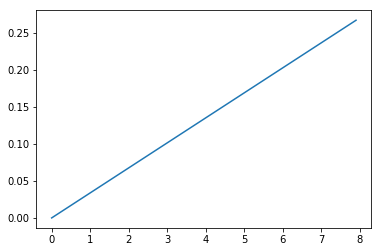

In [51]:
plt.plot(time, volume)
plt.show()

In [52]:
volume

array([0.        , 0.00338048, 0.00676095, 0.01014143, 0.01352191,
       0.01690239, 0.02028286, 0.02366334, 0.02704382, 0.03042429,
       0.03380477, 0.03718525, 0.04056572, 0.0439462 , 0.04732668,
       0.05070716, 0.05408763, 0.05746811, 0.06084859, 0.06422906,
       0.06760954, 0.07099002, 0.07437049, 0.07775097, 0.08113145,
       0.08451193, 0.0878924 , 0.09127288, 0.09465336, 0.09803383,
       0.10141431, 0.10479479, 0.10817526, 0.11155574, 0.11493622,
       0.1183167 , 0.12169717, 0.12507765, 0.12845813, 0.1318386 ,
       0.13521908, 0.13859956, 0.14198003, 0.14536051, 0.14874099,
       0.15212147, 0.15550194, 0.15888242, 0.1622629 , 0.16564337,
       0.16902385, 0.17240433, 0.1757848 , 0.17916528, 0.18254576,
       0.18592624, 0.18930671, 0.19268719, 0.19606767, 0.19944814,
       0.20282862, 0.2062091 , 0.20958957, 0.21297005, 0.21635053,
       0.21973101, 0.22311148, 0.22649196, 0.22987244, 0.23325291,
       0.23663339, 0.24001387, 0.24339434, 0.24677482, 0.25015

In [58]:
h_max = 0.5 * (casing_od - casing_id)
h = np.arange(0., h_max, 0.001)
v = volume_by_thickness(h, 0.5*tool_joint_diameter, 0.5*casing_id)
h_max

0.4720000000000004

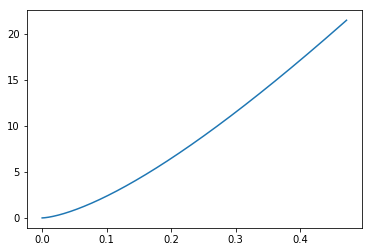

21.463987352410435

In [59]:
plt.plot(h, v)
plt.show()
v[-1]

In [60]:
casing_wear_thickness = np.interp(volume, v, h)

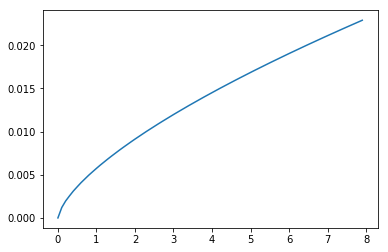

In [61]:
plt.plot(time, casing_wear_thickness)
plt.show()